### Vooyai Analytics

In [2]:
#Imports
from dataloader import VooyaiDataloader

dataset = VooyaiDataloader("./data/")
dataset.destinations_df.head(5)


,parent_id,name,description,countrycode,country,photo,latitude,longitude,language
0,6495a41534b3537e6759d56a,Nafplio,Nafplio es una ciudad costera en el Peloponeso...,GR,🇬🇷,https://live.staticflickr.com/65535/4835992334...,37.565923,22.806878,es
1,6495a41534b3537e6759d56a,Paros,Paros es una isla en el archipiélago de las Cí...,GR,🇬🇷,https://foto.wuestenigel.com/wp-content/upload...,37.065105,25.192167,es
2,6495a41534b3537e6759d56a,Monemvasia,Monemvasia es una ciudad fortificada en el Pel...,GR,🇬🇷,https://www.wondermondo.com/wp-content/uploads...,36.687774,23.055799,es
3,6495a41534b3537e6759d56a,Hydra,Hydra es una pequeña isla sin coches en el Gol...,GR,🇬🇷,https://wikitravel.org/upload/shared/2/24/Hydr...,36.747426,3.040183,es
4,6495a41534b3537e6759d56a,Chania,Chania es una ciudad costera en la isla de Cre...,GR,🇬🇷,https://perierga.gr/wp-content/uploads/2018/08...,35.512083,24.019154,es


#### Lets begin with something simple: lets plot all suggested destinations on a world map

In [3]:
#Imports 
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd


In [4]:
# Ensure that latitudes and longitudes are numeric
df = dataset.destinations_df.fillna(-1)
df['longitude'] = pd.to_numeric(dataset.destinations_df['longitude'], errors='coerce').fillna(-1)
df['latitude'] = pd.to_numeric(dataset.destinations_df['latitude'], errors='coerce').fillna(-1)

#Get all latitudes and longitudes
lats = df['latitude'].tolist()
lons = df['longitude'].tolist()

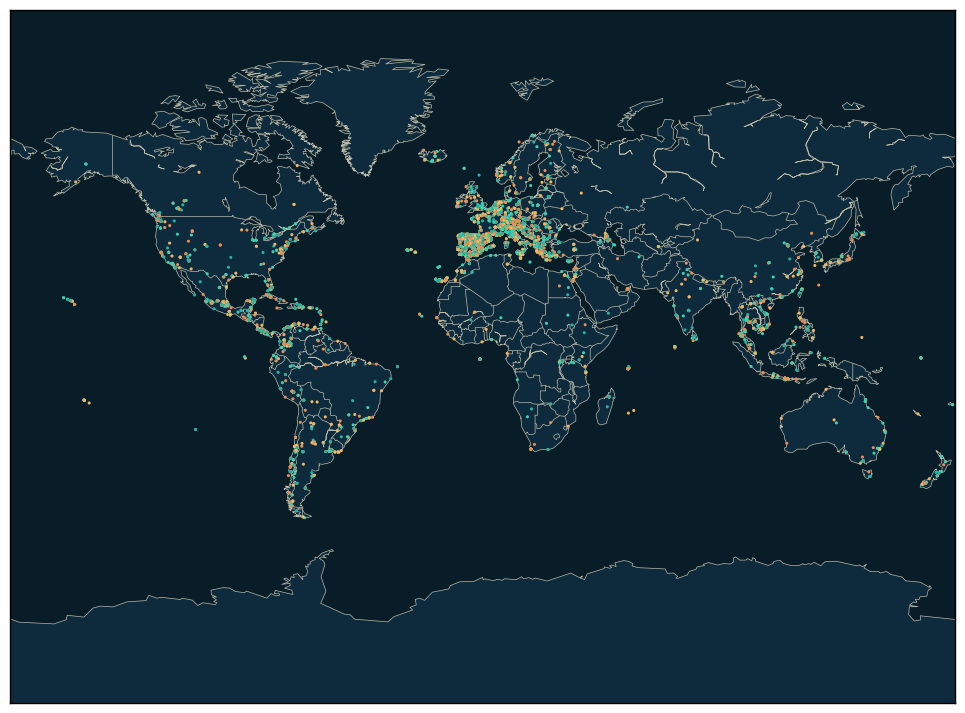

In [5]:
#First let's set the figure size
plt.figure(figsize=(18,9))

#Prepare the map projection
m = Basemap(projection='mill',  # Use Miller cylindrical projection
            llcrnrlat=-90,      # Lower-left corner latitude
            urcrnrlat=90,       # Upper-right corner latitude
            llcrnrlon=-180,     # Lower-left corner longitude
            urcrnrlon=180,      # Upper-right corner longitude
            resolution='c')     # Resolution of the map ('c' for crude, 'l' for low, etc.)

#Set up the style of the map
m.drawcoastlines(color='#bdbaa5',linewidth=0.5)
m.drawcountries(color='#bdbaa5',linewidth=0.5)

m.fillcontinents(color='#0d2b3d', lake_color='#091d29')
#Make the ocean very very slightly blue
m.drawmapboundary(fill_color='#091d29')#'#e8f7fa')

# Convert lat/lon to x/y coordinates
x, y = m(lons, lats)

#For style points, let's pick random colors in a colormap with the colors of Vooyai's logo, which are:
# #eb8f56 #27b3a5 #3bd4b4 #1c5473
colors = ['#f5b762','#eb8f56', '#3bd4b4', '#27b3a5']#, '#1c5473']
#Generate a continuous colormap from the colors
cmap = plt.cm.colors.ListedColormap(colors)

#Sample random colors for each point
random_colors = [colors[i % len(colors)] for i in range(len(lats))]
# Plot the points
m.scatter(x, y, marker='o', color=random_colors, zorder=5, s=5,edgecolors='black',linewidths=0.01)
#plt.title('Destinations suggested by Vooyai')
#Add the total amount of destinations on the bottom right in a box
#plt.text(0.95, 0.05, f'Total Unique Destinations: {len(lats)}', transform=plt.gca().transAxes, ha='right', va='bottom',bbox=dict(facecolor='white', alpha=0.5))
plt.show()

##### This will generate a video of the earth rotating with the destinations on it (uncomment last two lines to run)


In [6]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation, FFMpegWriter
 
fig = plt.figure(figsize=(12,12))
 

 
def update(frame):
    plt.clf()
    m = Basemap(projection='ortho', resolution='l',lat_0=0, lon_0=frame)
    m.drawcoastlines()
    m.fillcontinents(color='#fcfcf9', lake_color='#fafcfc',alpha=0.9)
    m.drawmapboundary(fill_color='#f6fcfc')

    m.drawcountries()
    m.drawparallels(np.arange(-80.,81.,20.))
    m.drawmeridians(np.arange(-180.,181.,20.))

    # Convert lat/lon to x/y coordinates
    x, y = m(lons, lats)

    #For style points, let's pick random colors in a colormap with the colors of Vooyai's logo, which are:
    # #eb8f56 #27b3a5 #3bd4b4 #1c5473
    colors = ['#eb8f56', '#27b3a5', '#3bd4b4', '#1c5473']
    #Generate a continuous colormap from the colors
    cmap = plt.cm.colors.ListedColormap(colors)

    #Sample random colors for each point
    random_colors = [colors[i % len(colors)] for i in range(len(lats))]
    # Plot the points
    m.scatter(x, y, marker='o', color=random_colors, zorder=5, s=15)
     
#ani = FuncAnimation(fig, update, frames=range(-180,181,1),repeat=False)
 
#ani.save('Earth Rotation Test 2.mp4', FFMpegWriter(fps=30))


<Figure size 1200x1200 with 0 Axes>

#### Now lets check the countries with more destinations using a heatmap

In [7]:
#First lest sort countries by the numer of destinations 
country_destinations_count = dataset.destinations_df.groupby('countrycode').size().sort_values(ascending=False)
# Apply logarithmic scaling before normalization to reduce the dominance of outliers
log_scaled = np.log1p(country_destinations_count)

# Now we want to make a min-max normalization on the log-scaled data
normalized = (log_scaled - log_scaled.min()) / (log_scaled.max() - log_scaled.min())

# Optional: You can further adjust the contrast by applying a power function
# Experiment with different values of alpha (e.g., 0.5, 0.3, 0.7) to find the best visual result
alpha = 0.7
normalized = normalized ** alpha

# Convert the normalized Series to a dictionary
normalized_dict = normalized.to_dict()



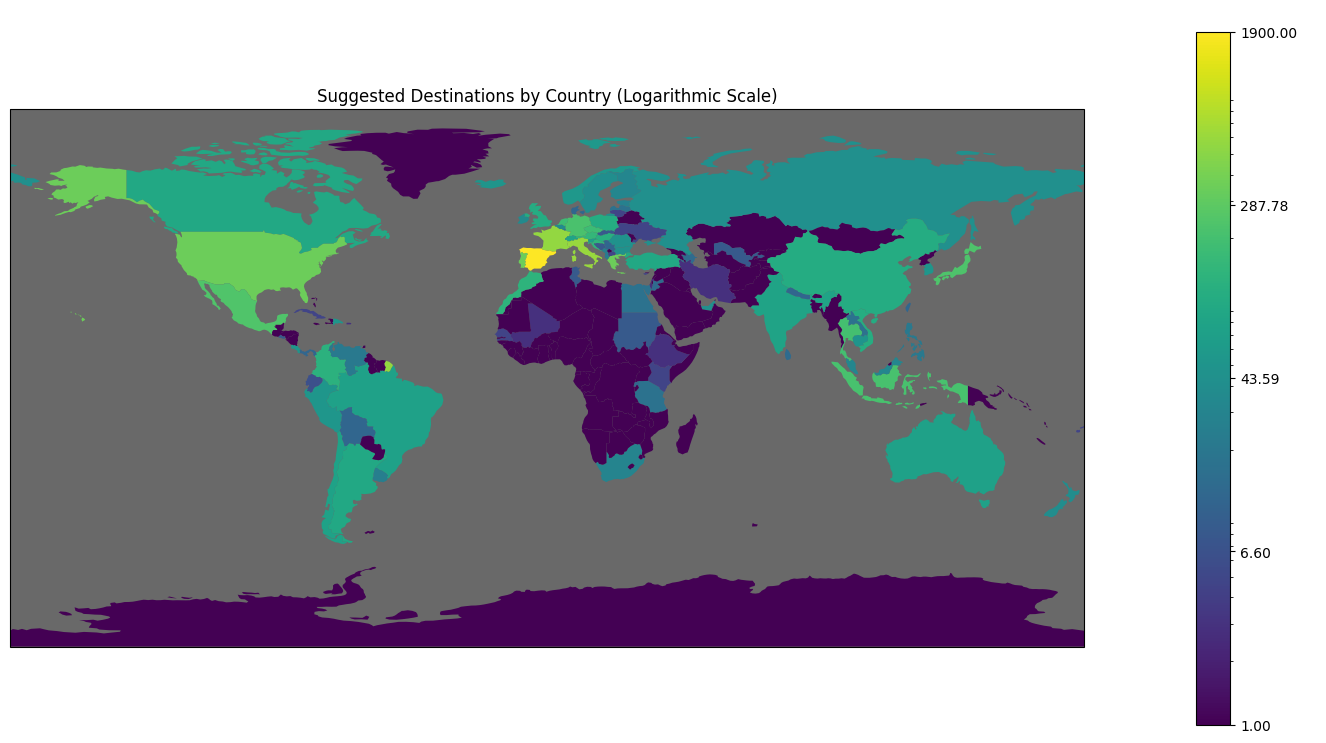

In [8]:
#For this, basemap is a bit limited so we go with cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib
import cartopy.io.shapereader as shpreader


plt.figure(figsize=(18,9))
#Change color from figure back to black
plt.rcParams['axes.facecolor'] = 'dimgray'
#Now from a colormap we sample colors based on normalized dict values, make max  value normalized.max()
colors = plt.cm.viridis(normalized)

#And make a list of tuples with the country code and the color
country_color_list = {country:color for country, color in zip(list(normalized_dict.keys()), colors)}
shapename = 'admin_0_countries'
countries_shp = shpreader.natural_earth(resolution='110m',
                                        category='cultural', name=shapename)



ax = plt.axes(projection=ccrs.PlateCarree())
for country in shpreader.Reader(countries_shp).records():
    cc = country.attributes['ISO_A2']

    if cc not in country_color_list:
        #Check if ISO_A2_EH is present in both attributes and colors
        if 'ISO_A2_EH' in country.attributes and country.attributes['ISO_A2_EH'] in country_color_list:
            cc = country.attributes['ISO_A2_EH']
        elif 'ISO_A3' in country.attributes and country.attributes['ISO_A3'] in country_color_list:
            cc = country.attributes['ISO_A3']
        else:
            #If not present, assign a default color
            cc = 'ZZ'
            country_color_list[cc] = plt.cm.viridis(0.0)
    try:
        ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                      facecolor=country_color_list[cc],
                      label=country.attributes['ISO_A2'])
    
    except:
        ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                    facecolor=plt.cm.viridis(0.0),
                    label=country.attributes['ISO_A2'])

# Create a ScalarMappable object for the colorbar
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=0, vmax=1))
sm.set_array([])  # This line is necessary for the colorbar to work correctly

min_v = int(np.floor(country_destinations_count.min()))
max_v = int(np.ceil(country_destinations_count.max()))
ticks = np.logspace(np.log10(min_v), np.log10(max_v), num=5)
sm.set_norm(matplotlib.colors.LogNorm(vmin=min_v, vmax=max_v))
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', pad=0.08, ticks=ticks)
cbar.set_label('Normalized Value (Log Scale)', color='white')
cbar.ax.set_yticklabels([f'{tick:.2f}' for tick in ticks])
cbar.ax.tick_params(colors='black')
cbar.ax.set_title('Destinations', color='white')
plt.title('Suggested Destinations by Country (Logarithmic Scale)')
plt.show()

We can see how some countries like Honduras have issues with more points showing in the destination image but only have one entry in the dataframe. This is a result of wrong geolocalization by our geolocation server. This also happens for Paraguay for example.

#### Lets compare the top 10 suggested countries by number of destinations with the actual number from global rankings:


##### We compare all the destinations suggested by Vooyai


In [9]:
ranking = pd.DataFrame({
    'CC': ['FR', 'ES', 'US', 'IT', 'TR', 'MX', 'GB', 'DE', 'GR', 'AT'],
    'Country': ['France', 'Spain', 'United States', 'Italy', 'Turkey', 'Mexico', 'United Kingdom', 'Germany', 'Greece', 'Austria']
})


#We keep top 10 countries with more destinations from vooyai, and replace  the sum with the order
vooyai_top_countries = country_destinations_count.sort_values(ascending=False).reset_index()
vooyai_top_countries['rank'] = vooyai_top_countries.index 
# Sort vooyai_top_countries based on the order of CC in ranking
vooyai_top_countries = vooyai_top_countries[vooyai_top_countries['countrycode'].isin(ranking['CC'])]
vooyai_top_countries = vooyai_top_countries.set_index('countrycode').loc[ranking['CC']].reset_index()
vooyai_top_countries.head(10)

,countrycode,0,rank
0,FR,412,2
1,ES,1900,0
2,US,238,4
3,IT,438,1
4,TR,53,25
5,MX,149,7
6,GB,60,23
7,DE,138,9
8,GR,238,3
9,AT,90,14


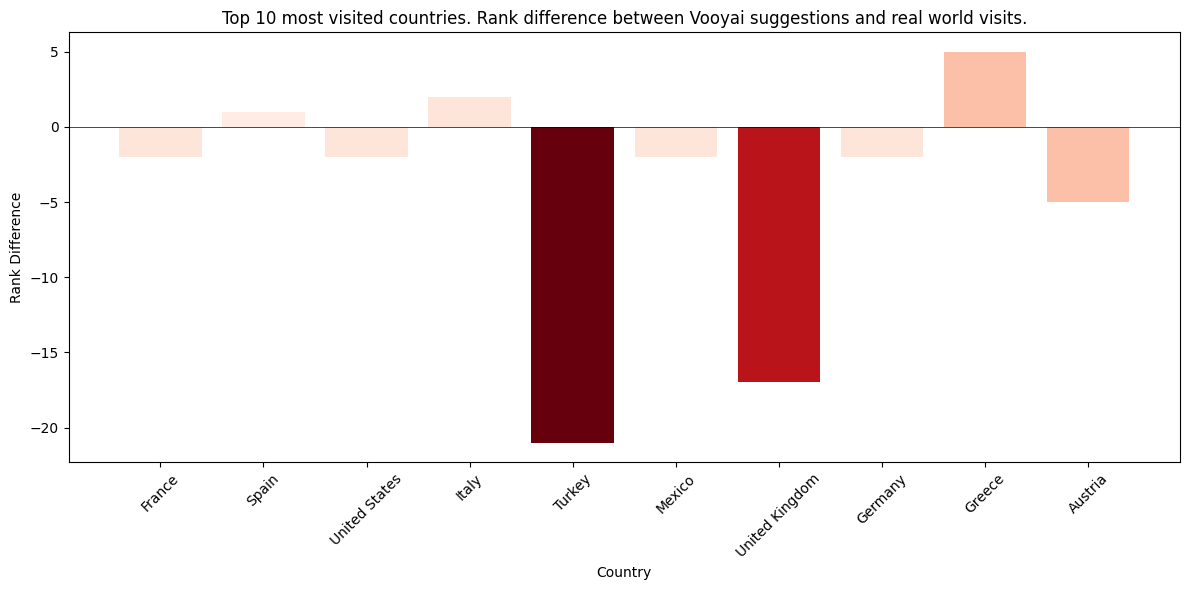

In [10]:
# Calculate rank differences
ranking_df = pd.DataFrame({
    'real_rank': ranking.index,
    'vooyai_rank': vooyai_top_countries['rank'],
    'country': ranking['Country']
})


ranking_df['rank_diff'] = ranking_df['real_rank'] -ranking_df['vooyai_rank'] 

plt.rcParams['axes.facecolor'] = 'white'
# Plotting
plt.figure(figsize=(12, 6))
colors = plt.cm.Reds(np.abs(ranking_df['rank_diff']) / np.abs(ranking_df['rank_diff']).max())
plt.bar(ranking['Country'], ranking_df['rank_diff'], color=colors)
plt.title('Top 10 most visited countries. Rank difference between Vooyai suggestions and real world visits.')
plt.xlabel('Country')
plt.ylabel('Rank Difference')
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()


Seems like our LLM doesn't enjoy suggesting Turkey or United Kingdom....
¿Is this a language issue? ¿Is there a gap between english and spanish suggestions?

##### Now we compare the suggestions for each language


In [11]:
#Lets now get the top 10 for Spanish and english and compare
#But first, lets see how many destinations we have per language
dataset.destinations_df['language'].value_counts()

language
es    5849
en    1041
Name: count, dtype: int64

Seems like we have a relation of 6 to 1 between english and spanish destinations 

In [12]:
#So lets get the rank for each country in the spanish and english lists
es_df = dataset.destinations_df[dataset.destinations_df['language'] == 'es']
en_df = dataset.destinations_df[dataset.destinations_df['language'] == 'en']

#Now lets group by country and get the size of each group
es_country_count = es_df.groupby('countrycode').size().sort_values(ascending=False)
en_country_count = en_df.groupby('countrycode').size().sort_values(ascending=False)

#Add the rank column
es_country_count = es_country_count.reset_index()
en_country_count = en_country_count.reset_index()


es_country_count['rank'] = es_country_count.index
en_country_count['rank'] = en_country_count.index

#Now we keep only the countries that are in the real top 10 (ranking)
es_country_count = es_country_count[es_country_count['countrycode'].isin(ranking['CC'])]
en_country_count = en_country_count[en_country_count['countrycode'].isin(ranking['CC'])]

#Sort values by real rank so we can compare afterwards
es_country_count = es_country_count.set_index('countrycode').loc[ranking['CC']].reset_index()
en_country_count = en_country_count.set_index('countrycode').loc[ranking['CC']].reset_index()





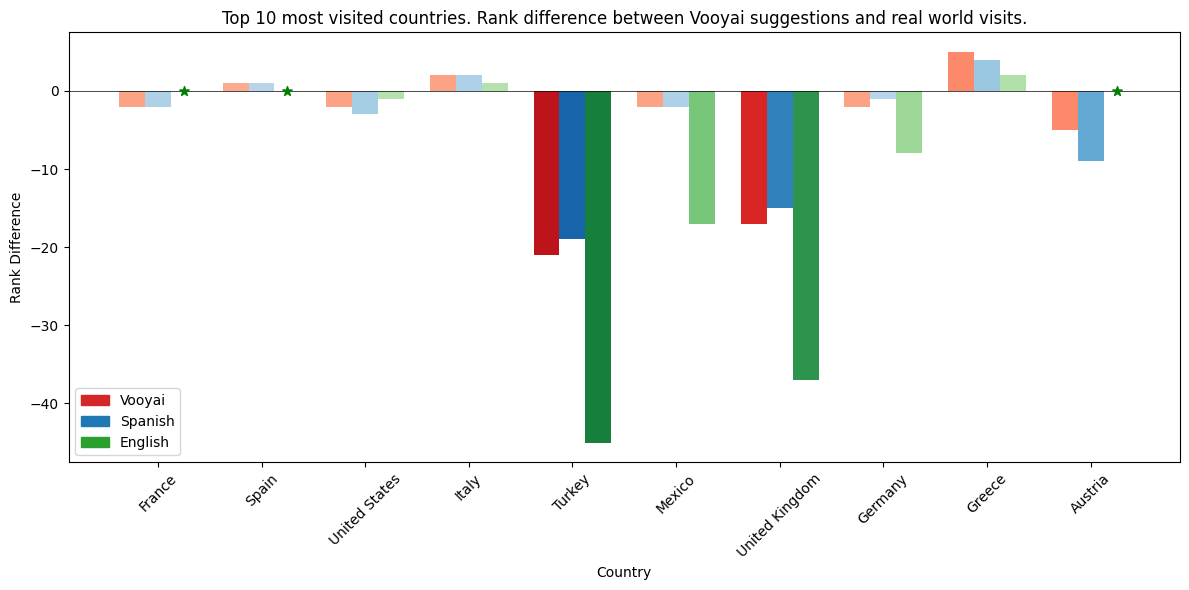

In [13]:
#And now calculate the difference in ranks 
ranking_df = pd.DataFrame({
    'real_rank': ranking.index,
    'es_rank': es_country_count['rank'],
    'en_rank': en_country_count['rank'],
    'vooyai_rank': vooyai_top_countries['rank'],
    'country': ranking['Country'],
    'CC': ranking['CC'],
})




ranking_df['vooyai_rank_diff'] = ranking_df['real_rank'] -ranking_df['vooyai_rank'] 
ranking_df['es_rank_diff'] = ranking_df['real_rank'] -ranking_df['es_rank'] 
ranking_df['en_rank_diff'] = ranking_df['real_rank'] -ranking_df['en_rank'] 

ranking_df.to_csv('data/ranking.csv')

plt.rcParams['axes.facecolor'] = 'white'
# Plotting
plt.figure(figsize=(12, 6))
# Define different color maps for each bar plot
# Normalize the rank differences to a range between 0.3 and 0.8 for smoother color gradients
norm_vooyai = (np.abs(ranking_df['vooyai_rank_diff']) - np.abs(ranking_df['vooyai_rank_diff']).min()) / (np.abs(ranking_df['vooyai_rank_diff']).max() - np.abs(ranking_df['vooyai_rank_diff']).min())
norm_es = (np.abs(ranking_df['es_rank_diff']) - np.abs(ranking_df['es_rank_diff']).min()) / (np.abs(ranking_df['es_rank_diff']).max() - np.abs(ranking_df['es_rank_diff']).min())
norm_en = (np.abs(ranking_df['en_rank_diff']) - np.abs(ranking_df['en_rank_diff']).min()) / (np.abs(ranking_df['en_rank_diff']).max() - np.abs(ranking_df['en_rank_diff']).min())

colors_vooyai = plt.cm.Reds(0.3 + 0.5 * norm_vooyai)
colors_es = plt.cm.Blues(0.3 + 0.5 * norm_es)
colors_en = plt.cm.Greens(0.3 + 0.5 * norm_en)

# Create the bar plots with different colors and slight offsets
bar_width = 0.25
index = np.arange(len(ranking['Country']))

# Plot bars for each dataset
plt.bar(index - bar_width, ranking_df['vooyai_rank_diff'], bar_width, color=colors_vooyai, label='Vooyai')
plt.bar(index, ranking_df['es_rank_diff'], bar_width, color=colors_es, label='Spanish')
plt.bar(index + bar_width, ranking_df['en_rank_diff'], bar_width, color=colors_en, label='English')

# Add green dots for rank differences of 0
plt.scatter(index[ranking_df['vooyai_rank_diff'] == 0] - bar_width, [0] * sum(ranking_df['vooyai_rank_diff'] == 0), color='green', s=50, zorder=3,marker='*')
plt.scatter(index[ranking_df['es_rank_diff'] == 0], [0] * sum(ranking_df['es_rank_diff'] == 0), color='green', s=50, zorder=3,marker='*')
plt.scatter(index[ranking_df['en_rank_diff'] == 0] + bar_width, [0] * sum(ranking_df['en_rank_diff'] == 0), color='green', s=50, zorder=3,marker='*')

# Add legend with solid colors
plt.legend(handles=[
    plt.Rectangle((0,0),1,1, color='tab:red', label='Vooyai'),
    plt.Rectangle((0,0),1,1, color='tab:blue', label='Spanish'),
    plt.Rectangle((0,0),1,1, color='tab:green', label='English')
])

# Update x-axis ticks
plt.xticks(index, ranking['Country'])
plt.title('Top 10 most visited countries. Rank difference between Vooyai suggestions and real world visits.')
plt.xlabel('Country')
plt.ylabel('Rank Difference')
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

#### <font size="5">Analyzing Ranking Differences Across Languages</font>
<font size="2">
The results reveal unexpected patterns in ranking differences between Vooyai suggestions and real-world visits for the top 10 most visited countries.
<p></p>

### Key Observations

1. **Inconsistent Distribution:**
   - Ranking differences don't consistently follow the expected pattern of "more visited" destinations being more commonly suggested.

2. **Language-Specific Biases:**
   - English results show more apparent bias than Spanish for certain countries (e.g., Turkey).
   - Significant discrepancies observed for countries like Mexico and Germany between languages.
   - ChatGPT, when prompted in English, accurately "ranks" France, Spain, and Austria.

3. **Vooyai Performance:**
   - Vooyai's ranking differences show unique patterns compared to both English and Spanish results.

### Potential Influencing Factors

- Data and training biases in AI models
- Cultural differences in travel preferences (Spanish-speaking users seems to prefer the Mediterranean more)
- Variations in tourism marketing across languages
</font>



<font size="2">Further investigation into these patterns could provide valuable insights for improving AI model performance and reducing biases in travel recommendations across different languages and cultures.</font>
